Задание: 
- Провести разведочный анализ данных
    - какие зависимости в данных?
    - сбалансированы ли классы?
    - основные статистики признаков
- Разделить данные на train/test
    - разделить на обучающую и тестовую подвыборки
    - сравнить статистики подвыборок и генеральной выборки
- Обучить модели классификации
    - какие метрики точности?
    - какая модель лучше всего справилась?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv(r'D:\Учеба\1 сем\ML\creditcard.csv\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Проверка наличия пустых значений
if df.isnull().values.any():
    print("Есть пустые значения в датафрейме")
    # Удаление строк с пустыми значениями
    df = df.dropna()
else:
    print("Нет пустых значений в датафрейме")

Нет пустых значений в датафрейме


In [4]:
# Проверка наличия дубликатов
if df.duplicated().any():
    print("Есть дубликаты в датафрейме")
    # Получение количества дубликатов перед удалением
    duplicates_before = df.duplicated().sum()
    # Удаление дубликатов
    df = df.drop_duplicates()
    # Получение количества дубликатов после удаления
    duplicates_after = df.duplicated().sum()
    # Вывод разницы
    print(f"Удалено дубликатов: {duplicates_before - duplicates_after}")
else:
    print("Нет дубликатов в датафрейме")

Есть дубликаты в датафрейме
Удалено дубликатов: 1081


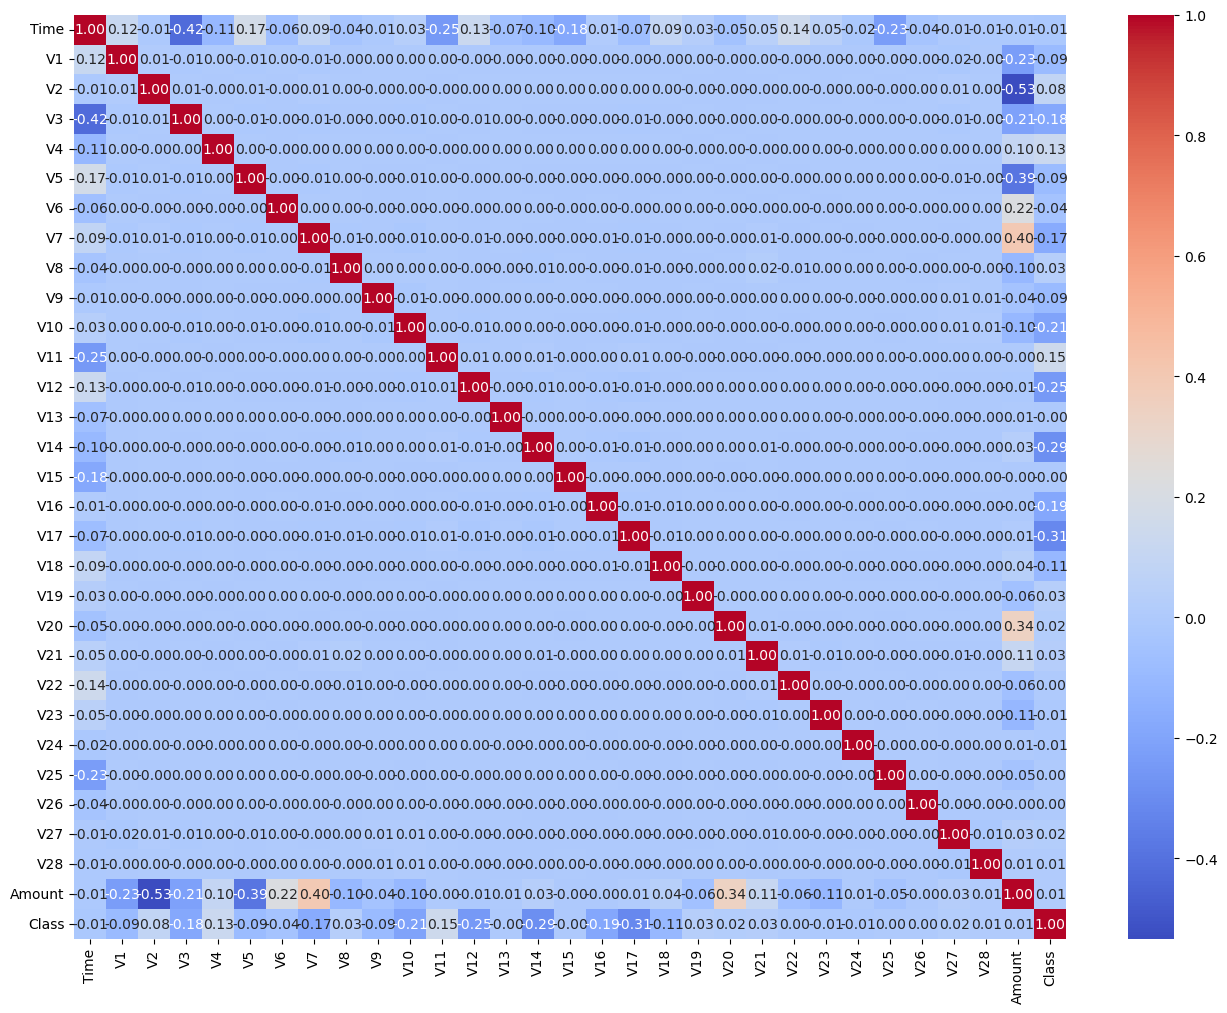

In [5]:
# Проверка корреляции признаков
correlation_matrix = df.corr()

# Визуализируем корреляцию с использованием тепловой карты
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Из матрицы видно, что признаки V1-V28 не коррелируют друг с другом, есть корреляция с Time, Class и Amount. Так как есть некоторые корреляции признаков, то необходимо понять вид этой зависимости для дальнейшего выбора модели обучения.

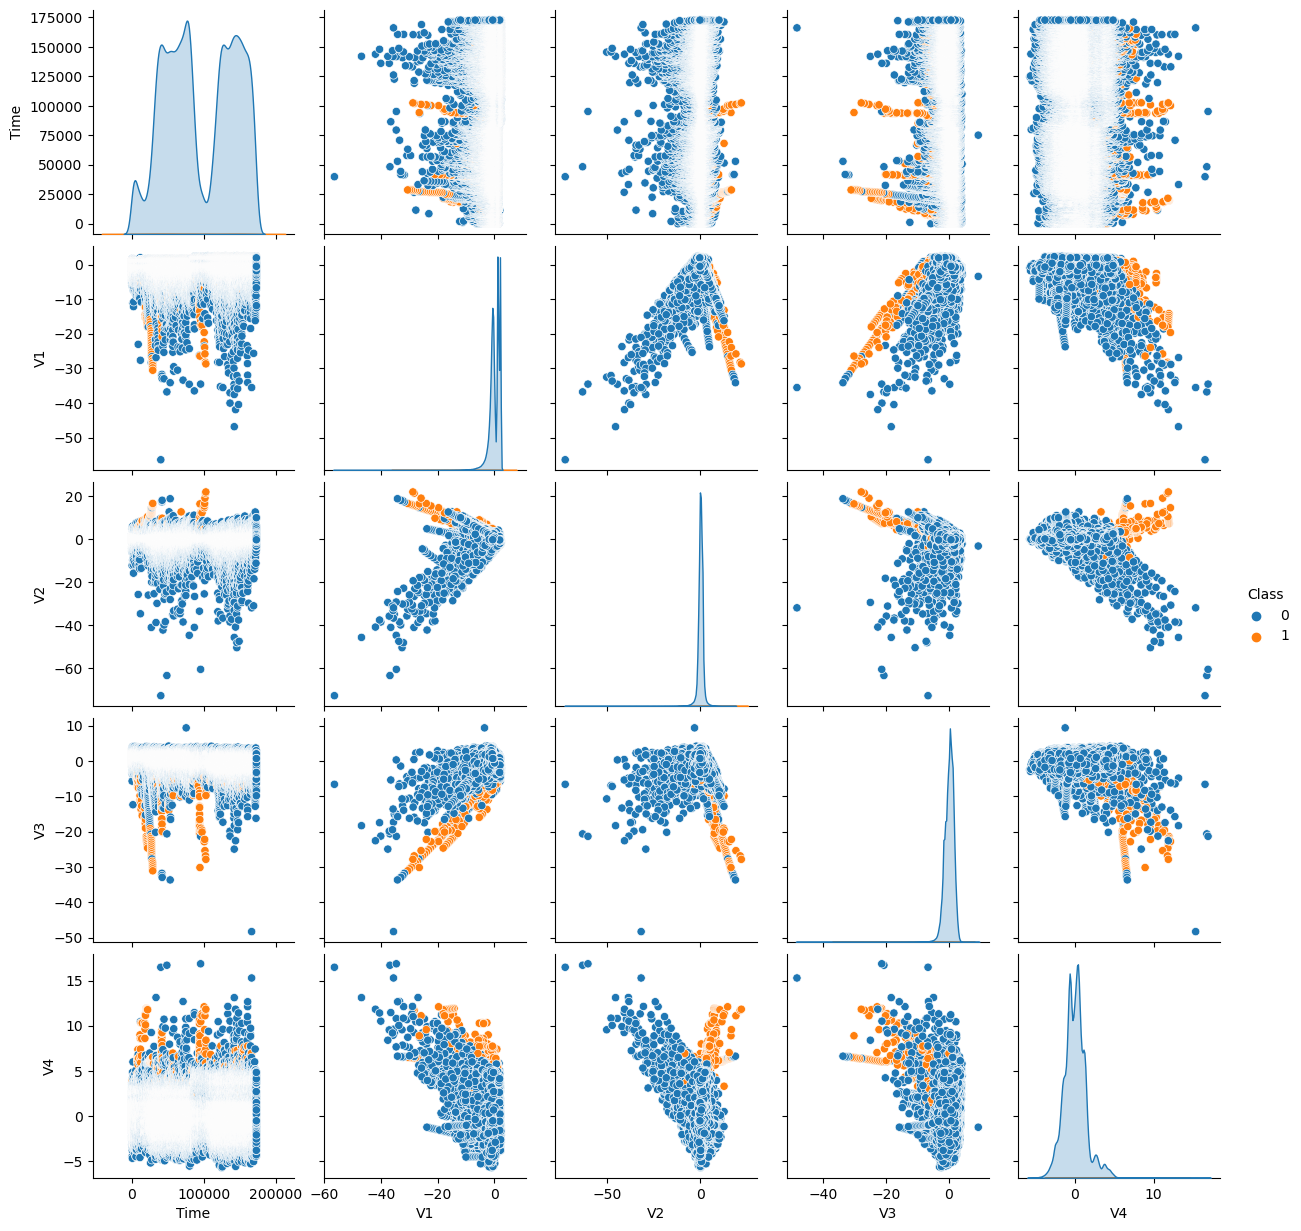

In [9]:
# Берем первые 5 признаков
selected_features = df.columns[:5]

# Добавляем столбец 'Class' в выбранные признаки
selected_features = selected_features.append(pd.Index(['Class']))

sns.pairplot(df[selected_features], hue='Class', diag_kind='kde')
plt.show()

Из диаграмм видно, что признаки имеют нелинейную зависимость, при этом можно визуально разделить мошеннические и легальные транзакции. Теперь проверим сбалансированность данных.

In [6]:
# Подсчет количества уникальных значений в столбце 'class'
class_counts = df['Class'].value_counts()

# Вывод сбалансированности классов
print("Количество легальных транзакций (class=0):", class_counts[0])
print("Количество мошеннических транзакций (class=1):", class_counts[1])

# Проверка сбалансированности
if class_counts[0] == class_counts[1]:
    print("Данные сбалансированы")
else:
    print("Данные несбалансированы")

Количество легальных транзакций (class=0): 283253
Количество мошеннических транзакций (class=1): 473
Данные несбалансированы


Так как данные несбалансированы, то нужно будет использовать сэмплирование. Будем использовать пересэмплирование, так как оно почти всегда работает лучше чем недосэмплирование. Далее пересэмплирование будет применено к обучающей выборке. Выделим тестовую и обучающую выборки.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Разделяем данные на признаки (X) и метки (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Статистики для обучающей выборки
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94784.824844,0.004318,-0.002854,0.001375,-0.002222,0.002471,-0.001759,0.001506,0.000444,-0.001922,...,0.000378,-0.000333,-0.001297,0.000156,0.000080,0.000601,0.000566,0.001978,0.000719,88.504929
std,47495.137144,1.948313,1.649149,1.512782,1.415649,1.388556,1.335118,1.240837,1.179931,1.095950,...,0.768462,0.722405,0.724749,0.628932,0.604963,0.521937,0.483391,0.396996,0.327816,252.411543
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54168.000000,-0.917838,-0.599484,-0.889918,-0.849764,-0.688236,-0.769480,-0.551961,-0.208703,-0.644291,...,-0.211497,-0.228571,-0.543165,-0.161774,-0.353833,-0.317411,-0.327384,-0.070644,-0.052843,5.600000
50%,84659.500000,0.020075,0.064758,0.181658,-0.022311,-0.052946,-0.276387,0.039933,0.022225,-0.052643,...,-0.062343,-0.029433,0.005883,-0.011224,0.040876,0.018097,-0.051652,0.001416,0.011282,22.000000
75%,139280.250000,1.315499,0.800914,1.025809,0.741202,0.615075,0.395555,0.570292,0.326579,0.595683,...,0.133300,0.185553,0.526754,0.147413,0.438874,0.351714,0.241420,0.091126,0.078354,77.340000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,19.587773,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [8]:
# Статистики тестовой выборки
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,94916.086773,0.012313,-0.009258,0.002564,-0.005944,-0.000746,0.001340,0.002981,-0.006047,-0.000293,...,-0.000577,-0.000520,0.005114,0.000367,0.000750,-0.003564,-0.001515,0.000903,-0.000139,88.343723
std,47424.922811,1.946881,1.636887,1.492180,1.408316,1.329826,1.319112,1.173503,1.175538,1.093670,...,0.776050,0.729903,0.723738,0.602336,0.608279,0.518334,0.476665,0.390699,0.328870,242.186176
min,4.000000,-40.470142,-42.172688,-31.103685,-5.600607,-25.791132,-20.367836,-21.922811,-50.420090,-6.912076,...,-21.387122,-22.889347,-8.887017,-22.575000,-2.822684,-4.781606,-1.773575,-8.839766,-8.464609,0.000000
25%,54320.250000,-0.908962,-0.603852,-0.887955,-0.851132,-0.696158,-0.767616,-0.554126,-0.209278,-0.643979,...,-0.211339,-0.227043,-0.540690,-0.161326,-0.356714,-0.317702,-0.324430,-0.070592,-0.052743,5.630000
50%,84856.000000,0.021525,0.059928,0.173975,-0.021964,-0.056065,-0.270871,0.043727,0.020641,-0.051905,...,-0.062393,-0.029527,0.009561,-0.010851,0.041461,0.009981,-0.054103,0.001778,0.011314,22.000000
75%,139383.000000,1.318048,0.796954,1.031859,0.733680,0.601452,0.399627,0.571267,0.322375,0.596890,...,0.133028,0.188953,0.534261,0.149069,0.443143,0.346665,0.235793,0.091456,0.077813,78.000000
max,172782.000000,2.430507,16.713389,4.040465,13.143668,29.162172,16.493227,25.235195,20.007208,9.234623,...,26.237391,27.202839,7.248763,18.364472,4.022866,5.473885,3.067907,9.200883,16.129609,12910.930000


In [9]:
from imblearn.over_sampling import RandomOverSampler

# Используем RandomOverSampler для увеличения
over_sampler = RandomOverSampler(sampling_strategy='minority')
# Пересэмплирование
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

# Новое количество записей в каждом классе
print("Количество записей после пересэмплирования:")
print(pd.Series(y_resampled).value_counts())

Количество записей после пересэмплирования:
0    226597
1    226597
Name: Class, dtype: int64


In [13]:
# Обучим модель Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9995594403129736

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.74      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



Также можно использовать модель логистической регрессии. Данная модель подходит для нелинейных зависимостей и не используется на сэмплированныех данных.

In [10]:
from sklearn.linear_model import LogisticRegression

# Обучим модель логистической регрессии
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_logreg = logreg_model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy: 0.9651252951749903

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56656
           1       0.04      0.89      0.07        90

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.53     56746
weighted avg       1.00      0.97      0.98     56746



Теперь используем модель KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализируем и обучим модель KNN на пересэмплированных данных
knn_model = KNeighborsClassifier()
knn_model.fit(X_resampled, y_resampled)

# Предсказания на тестовой выборке
y_pred_knn = knn_model.predict(X_test)

# Оценка качества модели
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9976738448525007

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.22      0.19      0.20        90

    accuracy                           1.00     56746
   macro avg       0.61      0.59      0.60     56746
weighted avg       1.00      1.00      1.00     56746



Вывод: если судить по метрике f1-score (среднее гармоническое из precision и recall), то модель random forest, обученная на пересэмплированных данных показывает наилучшие результаты.

# Ответы на вопросы

1. Вывести confusion matrix для всех моделей

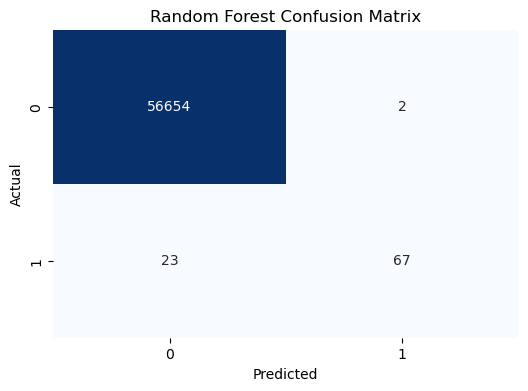

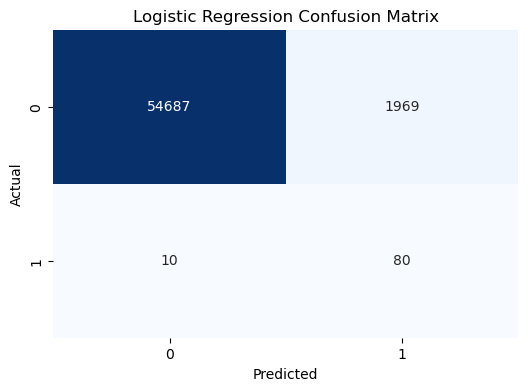

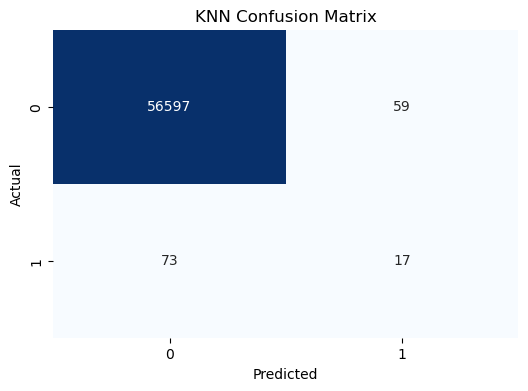

In [14]:
from sklearn.metrics import confusion_matrix

# Функция для вывода confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Вывод confusion matrix для модели Random Forest
plot_confusion_matrix(y_test, y_pred, "Random Forest Confusion Matrix")

# Вывод confusion matrix для модели Logistic Regression
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")

# Вывод confusion matrix для модели KNN
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")


Из матриц ошибок видно, что лучше всех справилась с задачей модель рандомного леса, правильно определив наибольшее количество легальных транзакций (TP=56654). Также данная модель совершила наименьшее количество ошибок в целом (FP=2 и FN=23). Модель логистической регрессии обнаружила наибольшее количество мошеннических транзакций (TN=80), но при этом имеет наибольшее количество транзакций, которые были ложно отнесены к мошенническим (FP=1969). Метод KNN, наоборот, определил наименьшее количество мошеннических транзакций (TN=17). 

2. Сравнить статистики сэмплированных и не сэмплированных данных. Не внесли ли дисперсии в данные после сэмплирования?

In [26]:
X_resampled.describe()-X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,...,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000,226214.000000
mean,-7366.413689,-2.302411,1.774577,-3.447749,2.282202,-1.527323,-0.723541,-2.682276,0.460864,-1.295870,...,0.216861,0.163870,0.070989,-0.031368,-0.051447,0.016600,0.025757,0.083678,0.033303,11.048457
std,1546.189447,3.573576,2.012648,4.647951,1.808181,2.904894,0.361489,4.504135,2.878669,1.259536,...,0.330627,1.196243,0.243062,0.383250,-0.037869,0.160616,-0.004816,0.570237,0.110470,-7.107006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9775.000000,-1.822645,0.464297,-4.114329,0.753347,-1.022980,-0.807574,-2.453992,0.011323,-1.673162,...,0.022260,0.053298,0.011669,-0.073322,-0.039929,-0.007622,0.028776,0.008283,-0.008625,-4.310000
50%,-5607.500000,-0.735489,0.915363,-1.571827,1.363698,-0.365191,-0.373739,-0.687395,0.125429,-0.661874,...,0.098259,0.172610,0.032845,-0.023270,-0.029869,0.022100,0.045485,0.049201,0.021039,-4.280000
75%,-4398.250000,-0.247307,2.008385,-0.679430,3.543144,-0.102755,-0.356269,-0.313402,0.526417,-0.418390,...,0.301297,0.423955,0.067324,0.043474,-0.062233,0.041825,0.092214,0.369584,0.133580,22.650000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
y_resampled.describe()-y_train.describe()

count    226214.000000
mean          0.498313
std           0.458957
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           0.000000
Name: Class, dtype: float64

Действительно, можно заметить, что тестовая и обучающая выборки имеют разные распределения. Из этого следует, что модель обучается на одних данных, а предсказание требуется от от выборки с другим распределением. В таком случае предлагается добавить методы Random Forest и KNN, обученные на несэмплированных данных с целью дальнейшего сравнения.

In [28]:
# DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Sampling', 'Accuracy', 'Classification Report'])

# Обучение модели Random Forest на несэмплированных данных
rf_model_unsampled = RandomForestClassifier(random_state=42)
rf_model_unsampled.fit(X_train, y_train)
y_pred_rf_unsampled = rf_model_unsampled.predict(X_test)

# Обучение модели KNN на несэмплированных данных
knn_model_unsampled = KNeighborsClassifier()
knn_model_unsampled.fit(X_train, y_train)
y_pred_knn_unsampled = knn_model_unsampled.predict(X_test)

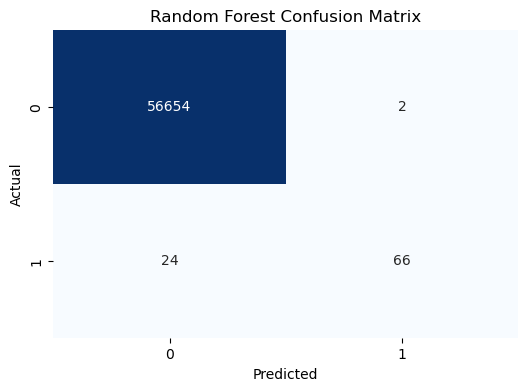

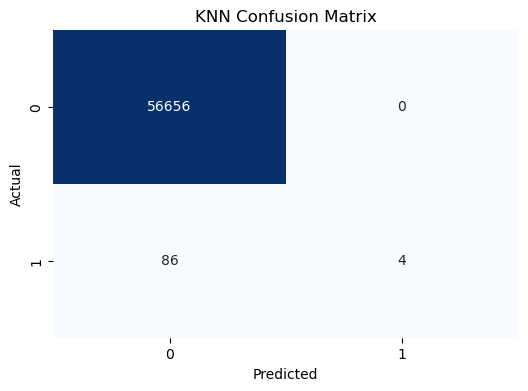

In [33]:
# Функция для вывода confusion matrix
def plot_confusion_matrix1(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Вывод confusion matrix для модели Random Forest
plot_confusion_matrix1(y_test, y_pred_rf_unsampled, "Random Forest Confusion Matrix")

# Вывод confusion matrix для модели KNN
plot_confusion_matrix1(y_test, y_pred_knn_unsampled, "KNN Confusion Matrix")

3. Свести в единую таблицу результаты всех моделей

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Sampling', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

# Функция для добавления результатов в DataFrame
def add_result(model_name, sampling_technique, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    results_df.loc[len(results_df)] = [model_name, sampling_technique, precision, recall, f1, accuracy]
    
# Добавление результатов
add_result('Random Forest', 'Unsampled', y_test, y_pred_rf_unsampled)
add_result('Logistic Regression', 'Unsampled', y_test, y_pred_logreg)
add_result('KNN', 'Unsampled', y_test, y_pred_knn_unsampled)
add_result('Random Forest', 'Resampled', y_test, y_pred)
add_result('KNN', 'Resampled', y_test, y_pred_knn)

print(results_df)

                 Model   Sampling  Precision    Recall  F1 Score  Accuracy
0        Random Forest  Unsampled   0.970588  0.733333  0.835443  0.999542
1  Logistic Regression  Unsampled   0.039043  0.888889  0.074801  0.965125
2                  KNN  Unsampled   1.000000  0.044444  0.085106  0.998484
3        Random Forest  Resampled   0.971014  0.744444  0.842767  0.999559
4                  KNN  Resampled   0.223684  0.188889  0.204819  0.997674


Исходя из данных в таблице можно сказать, что лучше всего себя показала модель Random Forest с сэмплированием, которая дает несколько лучший результат по сравнению с моделью без сэмплирования. KNN без сэмплирования дает очень много ложноотрицательных результатов по сравнению с моделью KNN с сэмплированием, несмотря на то что нет ни одного ложноположительного результата. Скорее всего это связано с несбалансированностью исходных данных.

4. Запустить обученные на сэмплированных данных модели на исходной выборке - что происходит с метриками точности?"

In [32]:
# Предсказание на исходной выборке для Random Forest
y_pred_X = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred_X))
print("\nClassification Report:\n", classification_report(y, y_pred_X))

# Предсказание на исходной выборке для KNN
y_pred_knn_X = knn_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred_knn_X))
print("\nClassification Report:\n", classification_report(y, y_pred_knn_X))

Accuracy: 0.999911886820383

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       1.00      0.95      0.97       473

    accuracy                           1.00    283726
   macro avg       1.00      0.98      0.99    283726
weighted avg       1.00      1.00      1.00    283726

Accuracy: 0.9986888758872997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.57      0.85      0.68       473

    accuracy                           1.00    283726
   macro avg       0.79      0.92      0.84    283726
weighted avg       1.00      1.00      1.00    283726



Можно заметить, что точность моделей выросла. Об этом можно судить по данным precision, recall и f1-score. Это может быть связано с тем, что тестовая выборка содержится в исходной.